In [14]:
import pandas as pd
df= pd.read_csv("student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [15]:
df.shape

(649, 33)

In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
def create_average_column():
    columns = ['G1', 'G2', 'G3']
    df['annual_grades_avg'] = df[columns].mean(axis=1)

In [19]:
create_average_column()

In [20]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,annual_grades_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333


In [21]:
def five_level_classification():
    bins = pd.IntervalIndex.from_tuples(
        [(0, 9.5), (9.5, 11.5), (11.5, 13.5), (13.5, 15.5), (15.5, 20)], closed='right')

    levels = ['fail', 'sufficient', 'satisfactory', 'good', 'excellent']
    df['annual_grades_evaluation'] = np.array(levels)[
        pd.cut(df['annual_grades_avg'], bins=bins).cat.codes]

In [22]:
five_level_classification()

In [23]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,annual_grades_avg,annual_grades_evaluation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7.333333,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10.333333,sufficient
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12.333333,satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14.000000,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12.333333,satisfactory


In [24]:
column_to_drop = ['G1', 'G2', 'G3']
df = df.drop(column_to_drop, axis=1)

In [25]:
def detect_outliers(columns):
    outlier_indices = []
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # IQR is interquartile range.

        mask = (df[column] >= Q1 - 1.5 *
                IQR) & (df[column] <= Q3 + 1.5 * IQR)
        mask = mask.to_numpy()
        false_indices = np.argwhere(~mask)
        outlier_indices.append(false_indices)
    return np.unique(np.concatenate(outlier_indices).ravel())

In [26]:
numerical_columns = ['age', 'absences', 'annual_grades_avg']
outlier_indices = detect_outliers(numerical_columns)

In [27]:
df = df.drop(outlier_indices, axis=0)

In [28]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,annual_grades_avg,annual_grades_evaluation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,7.333333,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,10.333333,sufficient
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12.333333,satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14.000000,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,12.333333,satisfactory


In [29]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns
binary_columns, nominal_columns, numerical_columns = get_columns_by_category()
# Now we can create a column transformer pipeline
transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')


In [31]:
binary_columns, nominal_columns, numerical_columns

(Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
        'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'],
       dtype='object'),
 Index(['Mjob', 'Fjob', 'reason', 'guardian'], dtype='object'),
 Index(['age', 'absences', 'annual_grades_avg'], dtype='object'))

In [32]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)

In [33]:
pipe = make_pipeline(transformer_pipeline,model)

In [36]:
result= cross_val_score(pipe,X_train,y_train,cv=7,scoring="accuracy")
print(result)

[0.89393939 0.89393939 0.89393939 0.89393939 0.90909091 0.89230769
 0.89230769]


In [37]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', OrdinalEncoder(),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')),
                                                 ('nominal', OneHotEncoder(),
                                                  Index(['Mjob', 'Fjob', 'reason', 'guardian'], dtype='object')),
                                                 ('numerical', StandardScaler(),
                                                  Index(['age', 'absences', 'annual_grades_avg'], dtype='object'))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [53]:
y_pred=pipe.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
X_test

0.935064935064935


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,annual_grades_avg
370,GP,F,19,U,LE3,A,1,1,other,other,...,yes,yes,5,3,4,1,1,4,2,8.333333
398,GP,F,18,U,GT3,T,2,3,at_home,other,...,yes,no,4,3,3,1,2,3,0,12.333333
168,GP,M,15,R,GT3,T,2,3,at_home,services,...,no,no,4,4,4,1,1,1,0,7.666667
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10.333333
134,GP,F,17,U,LE3,T,2,2,other,other,...,yes,yes,3,4,4,1,3,5,2,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,MS,M,18,R,GT3,T,1,0,at_home,at_home,...,no,no,4,3,2,1,1,4,0,12.333333
492,MS,F,16,R,GT3,A,2,2,health,other,...,no,yes,3,3,2,1,1,3,2,9.333333
613,MS,F,18,U,GT3,T,3,3,services,services,...,no,yes,5,3,4,1,1,5,0,10.000000
307,GP,M,17,U,GT3,T,3,1,services,other,...,yes,yes,5,4,4,3,4,5,0,12.000000


In [43]:
import pickle
pickle.dump(pipe,open("pipe.pkl","wb"))

In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 370 to 76
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             154 non-null    object 
 1   sex                154 non-null    object 
 2   age                154 non-null    int64  
 3   address            154 non-null    object 
 4   famsize            154 non-null    object 
 5   Pstatus            154 non-null    object 
 6   Medu               154 non-null    int64  
 7   Fedu               154 non-null    int64  
 8   Mjob               154 non-null    object 
 9   Fjob               154 non-null    object 
 10  reason             154 non-null    object 
 11  guardian           154 non-null    object 
 12  traveltime         154 non-null    int64  
 13  studytime          154 non-null    int64  
 14  failures           154 non-null    int64  
 15  schoolsup          154 non-null    object 
 16  famsup             154 no

In [56]:
inp = X_test.iloc[:1,:]

In [58]:
inp.to_csv("inp.csv")

In [62]:
def plot_grades_vs_count():
    nrows, ncols = 1, 2
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
    sns.countplot(data=df,
                  x='annual_grades_evaluation', ax=axes[0])

    sns.boxplot(data=df,
                x='annual_grades_evaluation', y='annual_grades_avg', ax=axes[1])

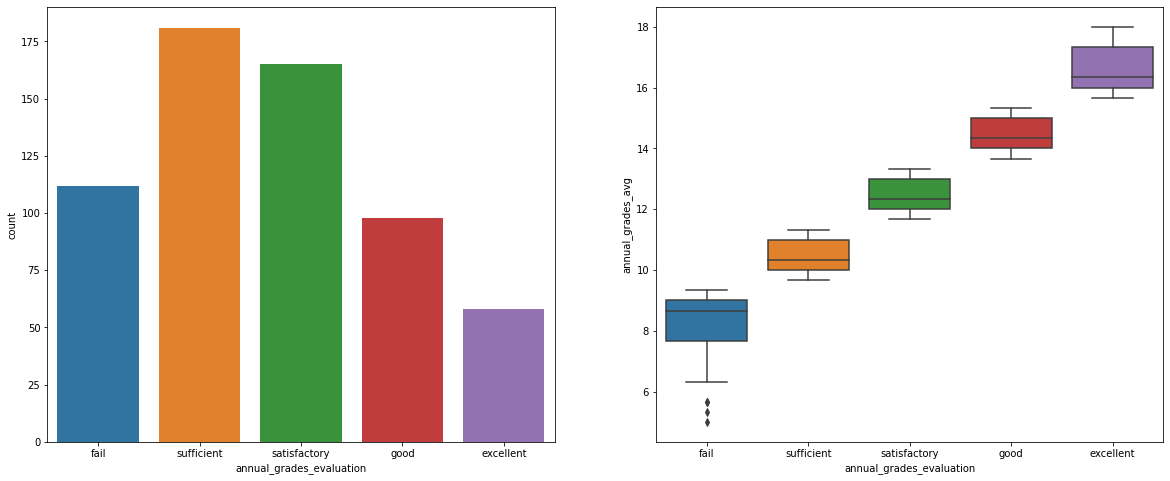

In [63]:
plot_grades_vs_count()

In [66]:
from sklearn.metrics import precision_score
pres= precision_score(y_test,y_pred,average="weighted")
print(pres)

0.8898071625344353


In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(9,9))
feat_importances.nlargest(10).plot(kind='pie')
plt.show()

ValueError: ignored